# Movie gross predictor based on the budget, runtime, votes, score, and the year of a movie.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('movies.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-86,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-86,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-86,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-86,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,01-08-86,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
# Removing all the budgets which are smaller than or equal to 0
df[df.budget > 0]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22-08-86,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11-06-86,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16-05-86,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18-07-86,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,01-08-86,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,Platoon,R,06-02-87,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000,Henson Associates (HA),UK,Jim Henson,Adventure,12729917,Labyrinth,PG,27-06-86,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228,Blue Velvet,R,23-10-86,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,28-02-86,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000,SLM Production Group,USA,David Cronenberg,Drama,40456565,The Fly,R,15-08-86,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [5]:
df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [6]:
df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f790fd162b0>,
      dtype=object)

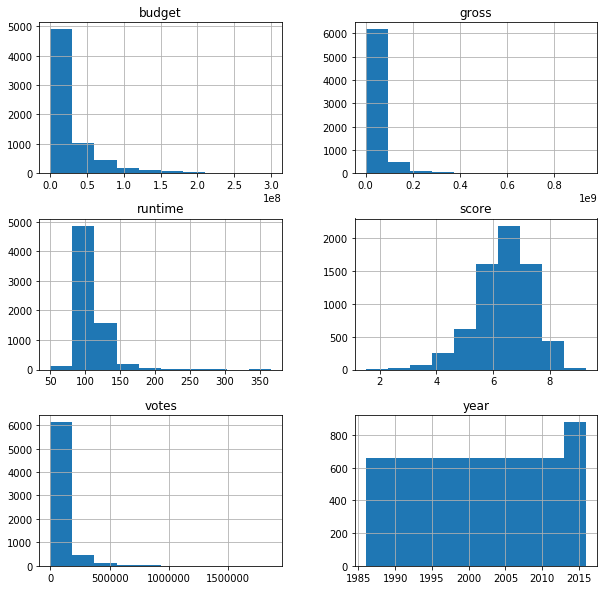

In [7]:
df.hist(figsize = (10, 10))

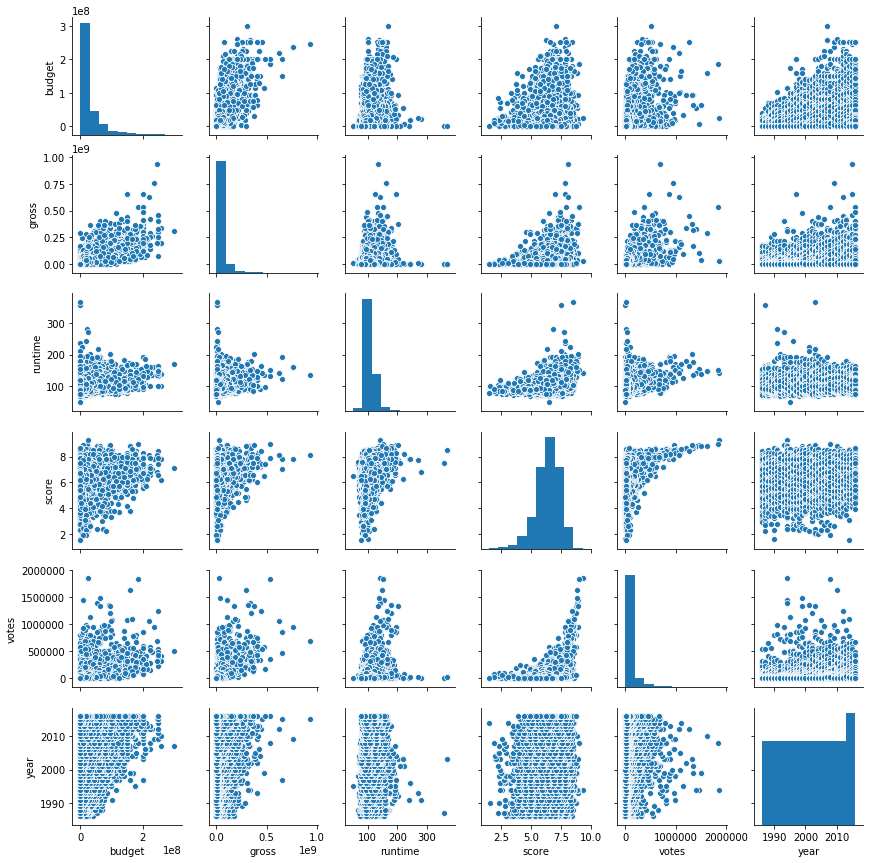

In [8]:
sns.pairplot(df, height = 2.0)

It can be seen that there is a strong correlation between the gross and the runtime, year, score, votes, and year of the movie.

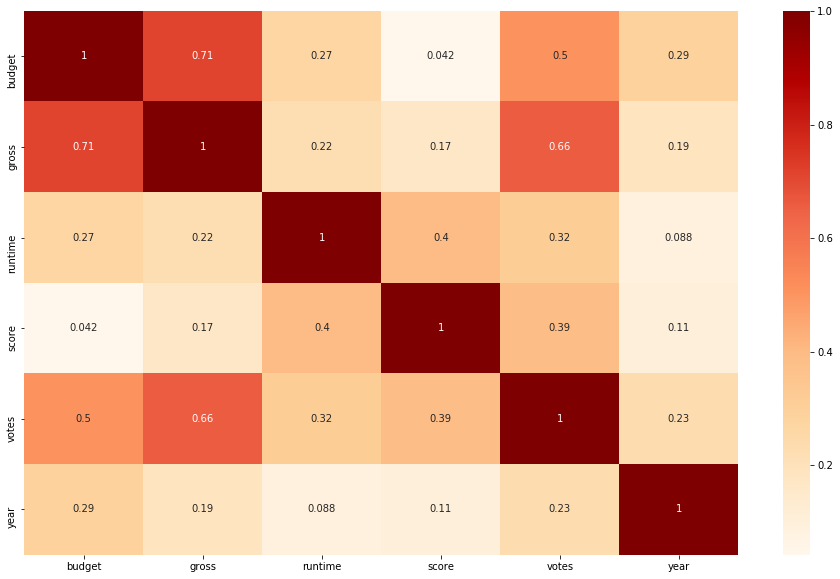

In [9]:
# Plotting the heatmap to see the corrleation between each variable
ax, fig = plt.subplots(figsize = (16, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'OrRd')

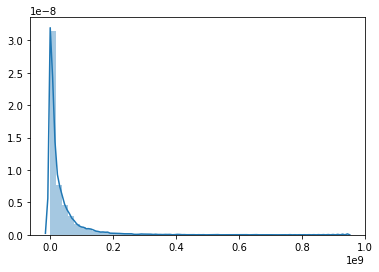

In [19]:
sns.distplot(df[['gross']])

In [11]:
# Removing the columns which are not numerical or do not affect the prediction
x = df.drop(['gross', 'director', 'star', 'company', 'country', 'genre', 'name', 'rating', 'released', 'writer'], axis = 1)
x.head()

,budget,runtime,score,votes,year
0,8000000,89,8.1,299174,1986
1,6000000,103,7.8,264740,1986
2,15000000,110,6.9,236909,1986
3,18500000,137,8.4,540152,1986
4,9000000,90,6.9,36636,1986


In [12]:
y = df['gross']

In [13]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 100, shuffle = True)

In [14]:
model = LinearRegression()
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
predicted = model.predict(test_x)

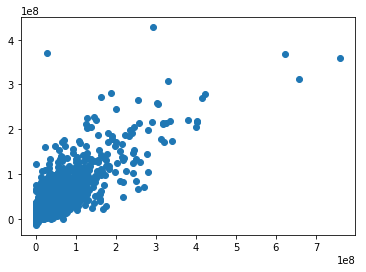

In [16]:
plt.scatter(test_y, predicted)

In [17]:
model.score(test_x, test_y)

0.6627167992565934

Model predicts with a 66% certaininty the correct gross of a movie. This shows that there are other factos other than budget, runtime, votes, score and year which affect the gross of a movie.